# What is Corona Virus(COVID-19)?
Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on date 27 March 2020), this leads to a total of 24K+ Deaths across the globe, including 16K+ deaths alone in Europe.Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time. In this notebook, the main focus is to analyze the spread trend of this virus all over the india.

# History of COVID-19 in India
On January 30, India reported its first case of COVID-19 in Kerala, which rose to three cases by February 3; all were students who had returned from Wuhan, China.No significant rise in cases was seen in the rest of February.

On 22 March 2020, India observed a 14-hour voluntary public curfew at the instance of the prime minister Narendra Modi.The government followed it up with lockdowns in 75 districts where COVID cases had occurred as well as all major cities.Further, on 24 March, the prime minister ordered a nationwide lockdown for 21 days, affecting the entire 1.3 billion population of India.

The transmission escalated during March, after several cases were reported all over the country, most of which were linked to people with a travel history to affected countries. On 12 March, a 76-year-old man who had returned from Saudi Arabia became the first victim of the virus in the country.On 4 March, 22 new cases came to light, including those of an Italian tourist group with 14 infected members.But number of cases start increasing dramtically after 19th March, but in the month of April it has been its peak.

Experts suggest the number of infections could be much higher as India's testing rates are among the lowest in the world.The infection rate of COVID-19 in India is reported to be 1.7, significantly lower than in the worst affected countries.

# Importing libraries and data :

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

plt.style.use("seaborn-talk")
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

from itertools import cycle, islice

import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
missing_arr=['N/a','na',"NaN","nan"]
df=pd.read_csv("covid_19_india_dataset.csv",na_values=missing_arr)
df.head(1)

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan


In [3]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms_df=pd.DataFrame(data=symptoms)

# Data Wrangling : 

In [4]:
#Remove unnecessary columns :

df=df.drop(['Source_1'],axis=1)
df=df.drop(['Source_2'],axis=1)
df=df.drop(['Source_3'],axis=1)
df=df.drop(['Estimated Onset Date'],axis=1)
df=df.drop(['Backup Notes'],axis=1)
df.head(1)

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date
0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020


In [5]:
#Data types :
df.dtypes

Patient Number                                int64
State Patient Number                         object
Date Announced                               object
Age Bracket                                  object
Gender                                       object
Detected City                                object
Detected District                            object
Detected State                               object
State code                                   object
Current Status                               object
Notes                                        object
Contracted from which Patient (Suspected)    object
Nationality                                  object
Type of transmission                         object
Status Change Date                           object
dtype: object

In [6]:
#Converting Date Announced and status change date from object data type to Date type.
df['Date Announced']=pd.to_datetime(df["Date Announced"]).dt.strftime('%d-%m-%Y')
df["Status Change Date"]=pd.to_datetime(df["Status Change Date"]).dt.strftime("%d-%m-%Y")
df.head(2)

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date
0,1,KL-TS-P1,30-01-2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-2020
1,2,KL-AL-P1,02-02-2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-2020


In [7]:
#set Patient Number as index.
df.set_index("Patient Number",inplace=True)
df.head(1)

,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date
Patient Number,,,,,,,,,,,,,,
1,KL-TS-P1,30-01-2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-2020


In [8]:
#Dealing NaN values.
df.isnull().sum()

State Patient Number                         14849
Date Announced                                   0
Age Bracket                                  15636
Gender                                       13560
Detected City                                15143
Detected District                             2932
Detected State                                   1
State code                                       1
Current Status                                   0
Notes                                         1318
Contracted from which Patient (Suspected)    15772
Nationality                                  15754
Type of transmission                         14355
Status Change Date                             111
dtype: int64

In [9]:
#filling in with values:
df=df.fillna("Unknown")

# Data Analysis :

Symptoms Analysis:

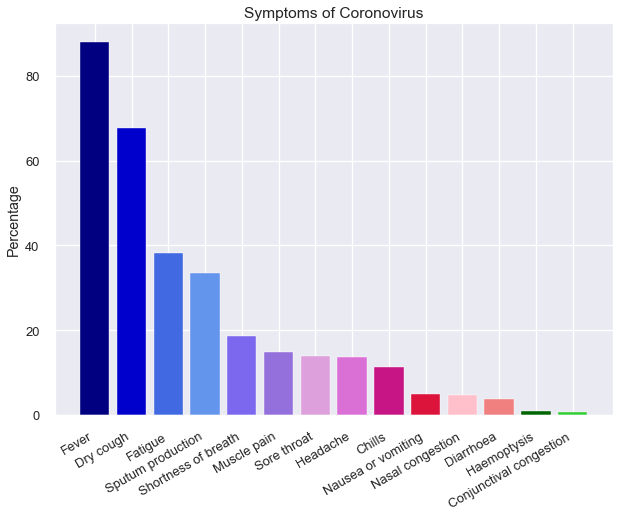

In [10]:
#plotting a bar plot to analyse symptoms effect :

# Initialize a Figure 
fig= plt.figure(figsize=(10,8))

# Set up Axes
ax = fig.add_subplot(111)     #mean 1,1,1

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Make a list by cycling through the colors you care about to match the length of your data.
my_colors = list(islice(cycle(['navy', 'mediumblue', 'royalblue', 'cornflowerblue', 'mediumslateblue','mediumpurple','plum','orchid','mediumvioletred',"crimson","pink","lightcoral",'darkgreen',"limegreen"]), None, len(df)))

#plot x=symptoms,y=percentage
plt.bar(symptoms_df["symptom"],symptoms_df["percentage"],color=my_colors)

ax.set(title="Symptoms of Coronovirus",ylabel="Percentage")
plt.show()

In [11]:
#Todo : display percentage when you click on bar graph.

Current situation analysis (total,recovered,active,death)

In [12]:
print(df['Current Status'].unique())

['Recovered' 'Hospitalized' 'Deceased' 'Migrated']


In [13]:
Total=len(df)
Recovered=len(df.loc[df["Current Status"]=="Recovered"])
Death=len(df.loc[df["Current Status"]=="Deceased" ])
Active=Total-(Recovered+Death)

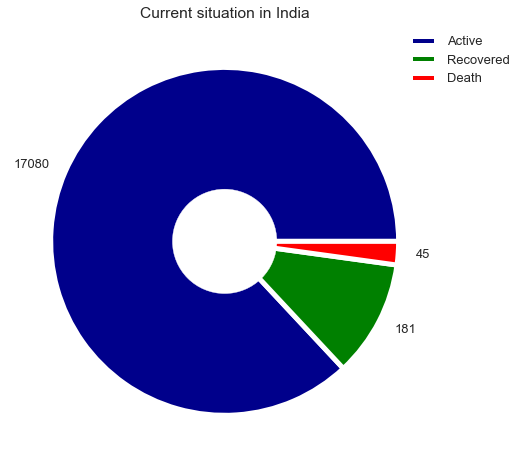

In [14]:
#plot a donut describing active/recovered/death :

# Initialize a Figure 
fig= plt.figure(figsize=(8,8))
# Set up Axes
ax = fig.add_subplot(111)     #mean 1,1,1

#create data 
data=[Active,Recovered,Death]
sizes=[80,10,2]
my_color=['darkblue','green','red']

my_circle=plt.Circle( (0,0), 0.3, color='white')
plt.pie(sizes, labels=data, colors=my_color, wedgeprops={'linewidth':5,'edgecolor':'white'})

p=plt.gcf()
p.gca().add_artist(my_circle)

legendlabel=["Active",'Recovered','Death']
plt.legend(legendlabel,loc="best",bbox_to_anchor=(0.9, 1.0),frameon=False)

plt.title("Current situation in India")
plt.show()


In [15]:
#TODO : when you click on wedge its shows the status+number

Gender wise active cases :

In [18]:
#first we need to select all cases where current status= hospitalized and then we need to group them into Female,male,unknown
temp=df[df["Current Status"]=="Hospitalized"]
female=len(temp.loc[temp["Gender"]=="F"])
male=len(temp.loc[temp["Gender"]=="M"])
unknown=len(temp)-(female+male)
print(len(temp),male,female,unknown)

17079 2409 1171 13499


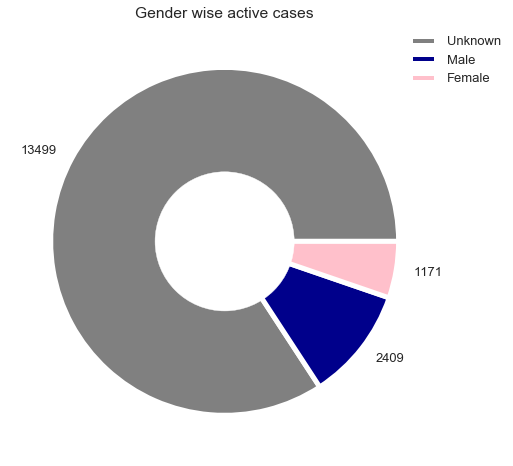

In [19]:
#plotting a donut fro gender wise active cases.

fig= plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)     #mean 1,1,1

data=[unknown,male,female]
sizes=[80,10,5]
my_colors=["grey","darkblue","pink"]

my_circle=plt.Circle((0,0),0.4,color="white")
plt.pie(sizes, colors=my_colors, labels=data, wedgeprops={"edgecolor":"white","linewidth":5})

p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Gender wise active cases")
legendlabel=["Unknown","Male","Female"]
plt.legend(legendlabel,loc="best",bbox_to_anchor=(0.9, 1.0),frameon=False)

plt.show()

In [20]:
#TODO :  Make it interactive 

Gender wise recovered cases :

In [21]:
temp=df[df["Current Status"]=="Recovered"]
total=len(temp)
female=len(temp.loc[temp["Gender"]=="F"])
male=len(temp.loc[temp["Gender"]=="M"])
unknown=total-(male+female)
print(total,male,female,unknown)

181 84 39 58


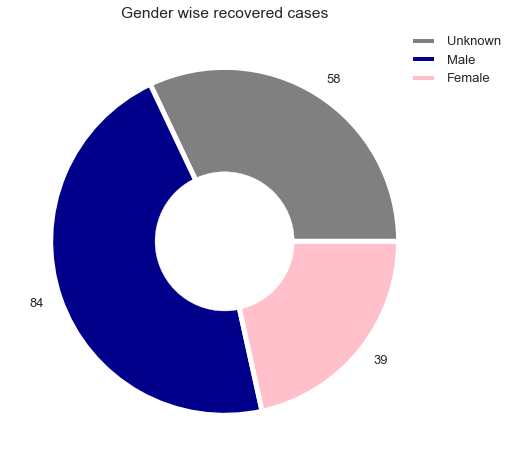

In [22]:
#plotting a donut for gender wise recovered cases.

fig= plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)     #mean 1,1,1

data=[unknown,male,female]
sizes=[58,84,39]
my_colors=["grey","darkblue","pink"]

my_circle=plt.Circle((0,0),0.4,color="white")
plt.pie(sizes, colors=my_colors, labels=data, wedgeprops={"edgecolor":"white","linewidth":5})

p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Gender wise recovered cases")
legendlabel=["Unknown","Male","Female"]
plt.legend(legendlabel,loc="best",bbox_to_anchor=(0.9, 1.0),frameon=False)

plt.show()

In [23]:
#TODOO :  make it interacctice 

Age wise patient count :

In [24]:
#plot count vs age 
#as age is varying ,therfore we cant directly plot it . we ahve to bin it in various groups.


In [25]:
temp=df.copy()
temp["Age Bracket"].replace("Unknown","0",inplace=True)
temp["Age Bracket"].replace("28-35","32",inplace=True)
temp["Age Bracket"].replace("1.5","1",inplace=True)
temp["Age Bracket"].unique()

array(['20', '0', '45', '24', '69', '55', '70', '16', '27', '59', '65',
       '75', '54', '53', '61', '25', '63', '46', '3', '48', '40', '47',
       '13', '96', '89', '85', '68', '26', '33', '76', '37', '43', '21',
       '42', '44', '51', '31', '32', '29', '67', '49', '52', '22', '18',
       '34', '28', '56', '35', '50', '30', '38', '23', '19', '58', '41',
       '2', '60', '74', '39', '17', '36', '57', '64', '81', '62', '73',
       '9', '7', '66', '12', '1', '14', '11', '6', '92', '72', '15', '77',
       '10', '80', '71', '78', '79', '90', '4', '8', '5'], dtype=object)

In [26]:
#converting the age bracket from object to numerical values to plot it nicely.
temp["Age Bracket"]=temp["Age Bracket"].astype(int)
temp.dtypes

State Patient Number                         object
Date Announced                               object
Age Bracket                                   int32
Gender                                       object
Detected City                                object
Detected District                            object
Detected State                               object
State code                                   object
Current Status                               object
Notes                                        object
Contracted from which Patient (Suspected)    object
Nationality                                  object
Type of transmission                         object
Status Change Date                           object
dtype: object

In [34]:
bins=[ -1,25,45,75,105]
group=[ 'Age(0-25)','Age(26-45)','Age(46-75)','Age(76-105)']
temp["age_bin"]=pd.cut(temp['Age Bracket'],bins,labels=group)

Age(0-25)      16010
Age(26-45)       707
Age(46-75)       562
Age(76-105)       27
Name: age_bin, dtype: int64


Text(0.5, 1.0, 'Age wise analysis')

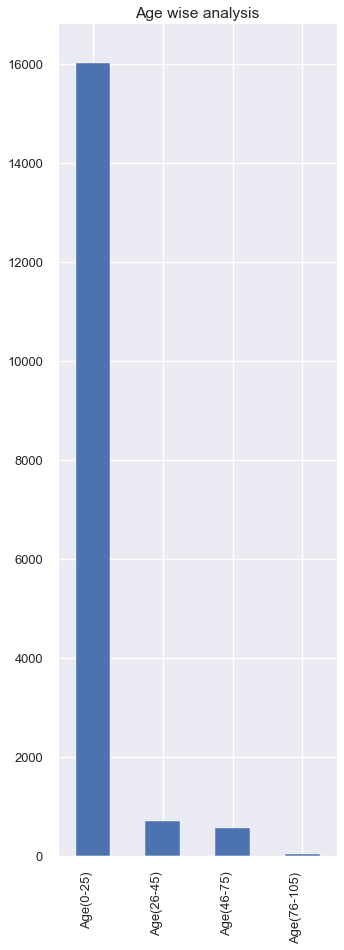

In [45]:
print(temp['age_bin'].value_counts())

fig=plt.figure(figsize=(5,17))
ax=fig.add_subplot(111)
fig.autofmt_xdate()

temp['age_bin'].value_counts().plot.bar()
plt.title("Age wise analysis")

In [46]:
#TODO : make it interactive.

Coronavirus cases -Total,Recovered,Death.

In [72]:
temp=df.copy()
def check_recovered_status(columnvalues):
    if columnvalues=="Recovered":
        return 1
    else:
        return 0
def check_death_status(columnvalues):
    if columnvalues=="Deceased":
        return 1
    else:
        return 0
temp["recovered"]=temp["Current Status"].apply(check_recovered_status)
temp["death"]=temp["Current Status"].apply(check_death_status)
temp.head(2)

,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,recovered,death
Patient Number,,,,,,,,,,,,,,,,
1,KL-TS-P1,30-01-2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,Unknown,India,Imported,14-02-2020,1,0
2,KL-AL-P1,02-02-2020,Unknown,Unknown,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,Unknown,India,Imported,14-02-2020,1,0


In [73]:
temp["recovered"]=temp["recovered"].cumsum()
temp["death"]=temp["death"].cumsum()
temp.head()

,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,recovered,death
Patient Number,,,,,,,,,,,,,,,,
1,KL-TS-P1,30-01-2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,Unknown,India,Imported,14-02-2020,1,0
2,KL-AL-P1,02-02-2020,Unknown,Unknown,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,Unknown,India,Imported,14-02-2020,2,0
3,KL-KS-P1,02-03-2020,Unknown,Unknown,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,Unknown,India,Imported,14-02-2020,3,0
4,DL-P1,03-02-2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",Unknown,India,Imported,15-03-2020,4,0
5,TS-P1,03-02-2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",Unknown,India,Imported,03-02-2020,5,0


In [ ]:
#plotting total,recovered,death date wise:

In [ ]:
fig=plt.figure(figsize=(22,15))
ax=fig.add_subplot(111)

fig.autofmt_xdate()

#plt.yticks(np.arange(0,5000,200))
#plt.bar(temp['Date Announced'],temp["Patient Number"].head(5000),label="Total cases")
plt.bar(temp['Date Announced'],temp['recovered'],label="Recovered")
plt.bar(temp["Date Announced"],temp['death'],label="Death")

plt.title("Covid'19 Cases,Recovery,Death in India")

In [ ]:
#plotting datewise daily distribution of covid'19 cases:

#Plot a line graph showing the trend in cases daily.

fig=plt.figure(figsize=(23,8))
ax=fig.add_subplot(111)

fig.autofmt_xdate()
my_colors=["darkblue"]
plt.bar(temp["Date Announced"],temp.index,label="Daily rise",color=my_colors)
ax.set(title="Daily rise in coronavirus cases",xlabel="Date Detected",ylabel="Patient count")

In [ ]:
#plotting recovered cases till date:

#Plot a line graph showing the trend in recovery daily.

fig=plt.figure(figsize=(23,8))
ax=fig.add_subplot(111)

fig.autofmt_xdate()
my_colors=["darkgreen"]
plt.bar(temp["Date Announced"],temp['recovered'],label="Recovered count",color=my_colors)
ax.set(title="Daily recovery  rise ",xlabel="Date",ylabel="Recovered count")

In [ ]:
#plotting recovered cases till date:

#Plot a line graph showing the trend in recovery daily.

fig=plt.figure(figsize=(23,8))
ax=fig.add_subplot(111)

fig.autofmt_xdate()
my_colors=["red"]
plt.bar(temp["Date Announced"],temp['death'],label="Death count",color=my_colors)
ax.set(title="Daily death rise ",xlabel="Date",ylabel="Death count")